### importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### importing dataset

In [48]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [49]:
A.extend(B)

In [50]:
print(A)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


In [51]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [52]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
fuel_data = pd.read_csv(r'C:\Users\TOBI\Desktop\datascience\Hamoye Intern files\fuel_ferc1.csv')

### checking out the dataset 

In [3]:
#lets see the number of rows and columns
fuel_data.shape

(29523, 11)

In [4]:
#to see the first few of the dataset
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
#description of the datasets
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [6]:
#checking the datatypes of the column and other information
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [7]:
#checking if there are duplicated rows
fuel_data.duplicated().any()

False

### Exploratory data analysis

#### missing values

In [8]:
#checking if there are any missing data in any column
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

### missing values in percentage

In [9]:
missing_data = (fuel_data.isnull().sum() / len(fuel_data)) * 100
missing_data = round(missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)[:5],3)
missing_data_pd = pd.DataFrame({'Missing Ratio' :missing_data})
print('missing_data in percent', missing_data_pd)

missing_data in percent            Missing Ratio
fuel_unit           0.61


#### Answer 6: 
##### feature with missing values: fuel_unit
##### total = 180
##### percent = 0.61

In [10]:
##### since fuel_unit has 180 missing data
##### lets look more into the feature

In [11]:
fuel_data["fuel_unit"].describe()

count     29343
unique        9
top         mcf
freq      11354
Name: fuel_unit, dtype: object

In [12]:
## fuel_units has 9 unique values
#lets check them out
fuel_data["fuel_unit"].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [13]:
#use groupby to count the sum of each unique value in the fuel unit column 
fuel_data.groupby('fuel_unit')['fuel_unit'].count() 

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

##### handling missing values

In [14]:
#since the most common fuel unit is mcf
#Fill the missing values with the mode
fuel_data['fuel_unit'].fillna("mcf", inplace=True)

In [15]:
#re checking if there are any missing data in the data
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

### Question 3... fuel_type_code with lowest average fuel cost per unit burned

In [16]:
#group the fuel_data by fuel_type_code_pudl
#return with the average(mean) of fuel_cost_per_unit_burned for each fuel type
fuel_data.groupby("fuel_type_code_pudl",as_index=False)["fuel_cost_per_unit_burned"].mean().sort_values(by="fuel_cost_per_unit_burned",ascending=True)

,fuel_type_code_pudl,fuel_cost_per_unit_burned
1,gas,13.659397
4,other,18.253856
5,waste,19.518122
0,coal,67.421830
3,oil,168.877086
2,nuclear,4955.157002


### Question 4 standard deviation and 75th percentile of the measure of fuel_mmbtu_per_unit

In [17]:
#pandas describe fynction on the column can give these statistics
fuel_data["fuel_mmbtu_per_unit"].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

### answer:
#### standard deviation = 10.6
#### 75th percentile = 17.01

### Questio 5 checking the kurtosis and skewness of fuel quantity burned

In [18]:
#two libraries can be used to check for the kurtosis and skewness
#scipy and pandas
from scipy import stats
from scipy.stats import kurtosis, skew
print("kurtosis =", stats.kurtosis(fuel_data["fuel_qty_burned"],bias=False))
print("skewness =", stats.skew(fuel_data["fuel_qty_burned"],bias=False))

kurtosis = 651.3694501337731
skewness = 15.8514954691095


### answer 5:
#### kurtosis = 651.3694501337731
#### skewness = 15.8514954691095

In [19]:
## using pandas to check the kurtosis and skewness
print(pd.DataFrame(fuel_data["fuel_qty_burned"]).kurtosis()[0])
print(pd.DataFrame(fuel_data["fuel_qty_burned"]).skew()[0])

651.3694501337732
15.851495469109503


### Question 8 Correlation matrix between numerical values 


In [20]:
import seaborn as sns
corr_matrix = fuel_data.corr()
print(corr_matrix)

                              utility_id_ferc1  report_year  fuel_qty_burned  \
utility_id_ferc1                      1.000000     0.093323        -0.057447   
report_year                           0.093323     1.000000         0.012952   
fuel_qty_burned                      -0.057447     0.012952         1.000000   
fuel_mmbtu_per_unit                  -0.066946    -0.110853        -0.080946   
fuel_cost_per_unit_burned            -0.037863     0.013599        -0.018535   
fuel_cost_per_unit_delivered         -0.016414    -0.014043        -0.003551   
fuel_cost_per_mmbtu                   0.006122     0.010261        -0.001896   

                              fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
utility_id_ferc1                        -0.066946                  -0.037863   
report_year                             -0.110853                   0.013599   
fuel_qty_burned                         -0.080946                  -0.018535   
fuel_mmbtu_per_unit                    

### to visualize the correlation matrix, we use seaborn heatmap

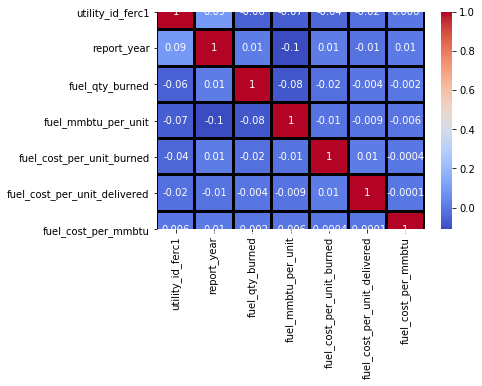

In [21]:
sns.heatmap(corr_matrix,annot=True, fmt='.1g',cmap='coolwarm',linewidths=2, linecolor='black')
plt.show()

### Answer 8 = 
#### fuel_qty_burned has -0.02 (second)corellation with fuel_cost_per_unit_burned
#### fuel_mmbtu_per_unit has -0.01 (third) corellation with fuel_cost_per_unit_burned

### Question 10  which year has the highest average fuel cost per unit delivered

In [22]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

#### Answer 10:
##### 1997 has 11140.20 highest average fuel cost per unit delivered

### Question 9 : to find percentage change in the fuel cost per unit burned of coal in 1998 compared to 1994

In [23]:
#taking a deeper look in the fuel_type_code_pudl column
fuel_data["fuel_type_code_pudl"].describe()

count     29523
unique        6
top         gas
freq      11486
Name: fuel_type_code_pudl, dtype: object

In [24]:
#use groupby to count the sum of each unique value in the fuel unit column 
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count() 

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

In [25]:
#making a copy of the original fuel data
coal_fuel_data = fuel_data.copy()

In [26]:
#coal_fuel_data

In [27]:
#since we want data of coal only, 
#lets call out all subset of the fuel_data dataset with fuel type coal
coal_fuel_data.query("fuel_type_code_pudl == 'coal'", inplace = True)

In [28]:
#record_id is of little significant to us here, lets drop it
coal_fuel_data.drop('record_id',axis=1)

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,rockport,coal,ton,5377489.0,16.59000,18.590,18.530,1.121
1,1,1994,rockport total plant,coal,ton,10486945.0,16.59200,18.580,18.530,1.120
2,2,1994,gorgas,coal,ton,2978683.0,24.13000,39.720,38.120,1.650
3,2,1994,barry,coal,ton,3739484.0,23.95000,47.210,45.990,1.970
5,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.92200,44.240,43.250,1.850
...,...,...,...,...,...,...,...,...,...,...
29503,191,2018,lawrence,coal,ton,1761218.0,17.88832,26.775,27.392,1.497
29510,403,2018,wygen 2,coal,ton,569800.0,16.11000,14.760,0.810,1.130
29516,12,2018,neil simpson unit 2,coal,ton,491913.0,16.10000,14.760,17.720,1.100
29517,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.06800,13.690,14.310,0.890


In [29]:
#lets find the sum of fuel_cost_per_unit_burned of coal in each year
coal2 = coal_fuel_data.groupby('report_year')['fuel_cost_per_unit_burned'].sum()

In [30]:
coal2

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [31]:
#to find the percentage change over a period of 4 years (1994 and 1998)
coal2.pct_change(periods=4)

report_year
1994         NaN
1995         NaN
1996         NaN
1997         NaN
1998   -0.205677
1999    0.118838
2000    6.911019
2001   -0.654589
2002   -0.229482
2003    0.898621
2004   -0.904091
2005   -0.264864
2006    0.352357
2007   -0.581149
2008    0.487879
2009    3.101388
2010    6.145852
2011    0.311284
2012    0.224316
2013   -0.612997
2014   -0.826102
2015   -0.215445
2016   -0.367328
2017   -0.418357
2018   -0.384371
Name: fuel_cost_per_unit_burned, dtype: float64

### Answer:
#### the percentage change in the fuel cost per unit burned of coal in 1998 compared to 1994 is -0.21

## visualization of fuel_unit features

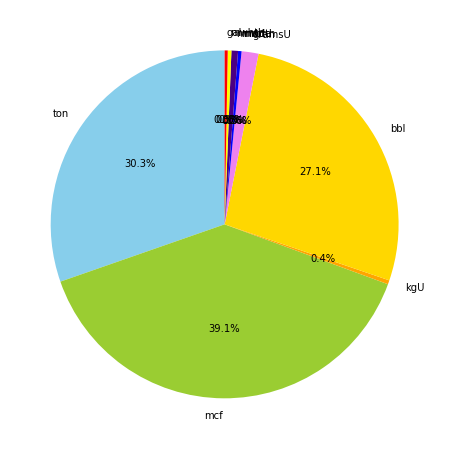

In [32]:



plt.figure(figsize=(12,8))

#data to plot 
labels = 'ton', 'mcf','kgU','bbl','gramsU', 'mode', 'mwdth', 'mmbtu','mwhth', 'gal'
sizes = [len(fuel_data[fuel_data['fuel_unit']=="ton"]), len(fuel_data[fuel_data['fuel_unit']=="mcf"]),
len(fuel_data[fuel_data['fuel_unit']=="kgU"]),len(fuel_data[fuel_data['fuel_unit']=="bbl"]),
         len(fuel_data[fuel_data['fuel_unit']=="gramsU"]),len(fuel_data[fuel_data['fuel_unit']=="mode"]),
         len(fuel_data[fuel_data['fuel_unit']=="mwdth"]),len(fuel_data[fuel_data['fuel_unit']=="mmbtu"]),
         len(fuel_data[fuel_data['fuel_unit']=="mwhth"]),len(fuel_data[fuel_data['fuel_unit']=="gal"])]
colors = ['Skyblue','yellowgreen','orange','gold', "violet", "green","blue","indigo", "yellow","red"]
explode = (0, 0, 0, 0,0,0,0,0,0,0) # explode 1st slice

#plot
plt.pie(sizes, explode=explode, labels= labels,colors=colors, 
autopct= '%1.1f%%', shadow=False, startangle=90)

#plt.axis('equal')
plt.show()

Text(0.5, 0, 'Fuel Unit')

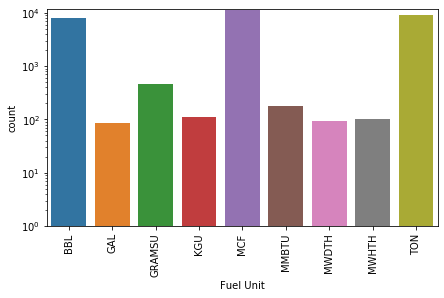

In [33]:
# visualizing the fuel unit type
# Import plotting library  
plt.figure(figsize=(7,4)) 
plt.xticks(rotation=90) 
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]}) 
sns.barplot(data=fuel_unit, x='unit', y='count') 
plt.xlabel('Fuel Unit') 
#Because of the extreme range of the values for the fuel unit,
#we can plot the barchart by taking the logarithm of the y-axis as follows: 
g = sns.barplot(data=fuel_unit, x='unit', y='count') 
g.set_yscale("log") 
g.set_ylim(1, 12000) 
plt.xlabel('Fuel Unit') 


### looking into fuel_type_code_pudl features

In [34]:
fuel_data["fuel_type_code_pudl"].describe()

count     29523
unique        6
top         gas
freq      11486
Name: fuel_type_code_pudl, dtype: object

In [35]:
#lets check the values out
fuel_data["fuel_type_code_pudl"].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [36]:
#use groupby to count the sum of each unique value in the fuel unit column 
fuel_data.groupby('fuel_type_code_pudl')['fuel_type_code_pudl'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

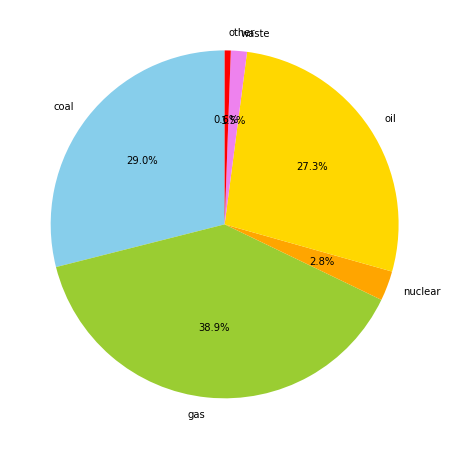

In [37]:
#visualizing the fuel type code pudl
plt.figure(figsize=(12,8))

#data to plot 
labels = 'coal', 'gas','nuclear','oil','waste','other'
sizes = [len(fuel_data[fuel_data['fuel_type_code_pudl']=="coal"]), len(fuel_data[fuel_data['fuel_type_code_pudl']=="gas"]),
len(fuel_data[fuel_data['fuel_type_code_pudl']=="nuclear"]),len(fuel_data[fuel_data['fuel_type_code_pudl']=="oil"]),
         len(fuel_data[fuel_data['fuel_type_code_pudl']=="waste"]),len(fuel_data[fuel_data['fuel_type_code_pudl']=="other"])]
colors = ['Skyblue','yellowgreen','orange','gold', "violet","red"]
explode = (0, 0, 0, 0,0,0) # explode 1st slice

#plot
plt.pie(sizes, explode=explode, labels= labels,colors=colors, 
autopct= '%1.1f%%', shadow=False, startangle=90)

#plt.axis('equal')
plt.show()

### looking into plant_name_ferc1

In [38]:
fuel_data["plant_name_ferc1"].describe()

count         29523
unique         2315
top       big stone
freq            156
Name: plant_name_ferc1, dtype: object

In [39]:
# visualizing the report year and number of reports

In [40]:
fuel_data.groupby('report_year')['report_year'].count() 

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [41]:
#group by the fuel type code year and print the first entries in all the groups formed 
fuel_data.groupby('fuel_type_code_pudl').first() 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


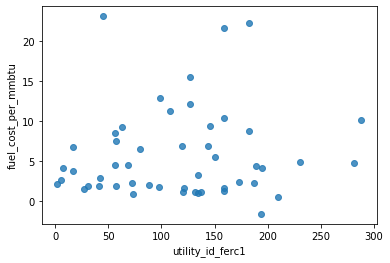

In [42]:
# Select a sample of the dataset 
sample_df = fuel_data.sample(n=50, random_state=4) 
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)